Here We Are...
10000/10000 [==============================] - 1s 70us/step


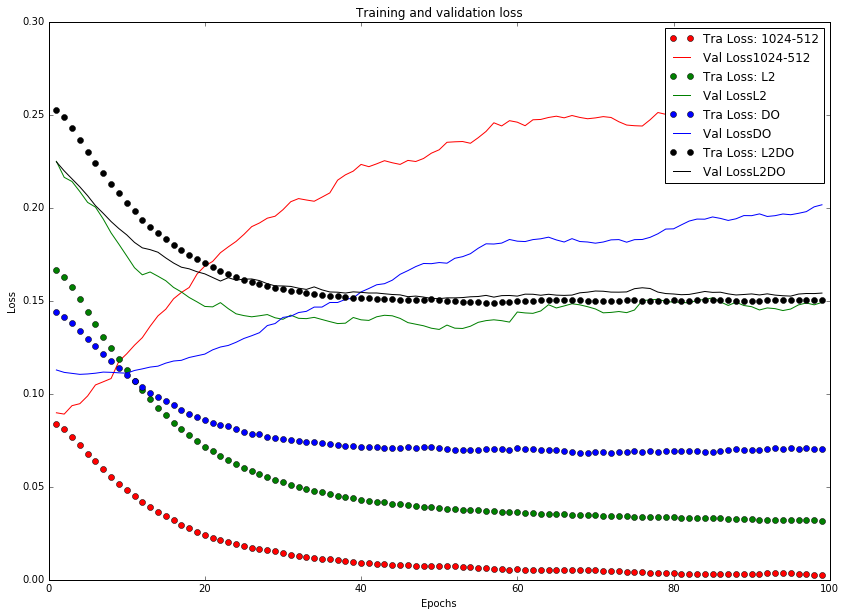


 Test_Acc 1024: 98.15  --- Test_Loss 1024: 0.234

 Test_Acc L2: 97.87  --- Test_Loss L2: 0.1203

 Test_Acc DO: 98.46  --- Test_Loss DO: 0.1663

 Test_Acc L2DO: 97.96  --- Test_Loss L2DO: 0.1363


In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Dec  4 15:13:04 2017

@author: malekzadeh
"""
import numpy as np
from keras.datasets import mnist
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

def plot_history(loss, val_loss, typeof, color):
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, color+'o', label='Tra Loss: '+typeof)
    plt.plot(epochs, val_loss, color, label='Val Loss'+typeof)
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(14, 10)

print("Here We Are...")
epoc = 100
vbs1 = 0
vbs2 = 0
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
test_images = test_images.reshape((10000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

indices = np.arange(train_images.shape[0])
np.random.shuffle(indices)
train_images = train_images[indices]
train_labels = train_labels[indices]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

x_val = train_images[:5000]
x_train = train_images[5000:]
y_val = train_labels[:5000]
y_train = train_labels[5000:]


network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer="rmsprop",
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

history = network.fit(x_train, y_train, 
            epochs=epoc, batch_size=128,verbose = vbs1,
            validation_data=(x_val,y_val)
            )

loss = (history.history['loss'])[1:]
val_loss = (history.history['val_loss'])[1:]
loss = smooth_curve(loss)
val_loss = smooth_curve(val_loss)
svl = np.array(val_loss)
best_epoc = (np.array(svl)).argmin() + 1
plot_history(loss,val_loss, '1024-512', 'r')

network.fit(train_images, train_labels, 
            epochs=best_epoc, batch_size=128,verbose = vbs2
            )
test_loss1024, test_acc1024 = network.evaluate(test_images, test_labels)

#############################

network = models.Sequential()
network.add(layers.Dense(1024, activation='relu',
                         kernel_regularizer=regularizers.l2(0.0001),
                         input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu',
                         kernel_regularizer=regularizers.l2(0.0001),
                         input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer="rmsprop",
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

history = network.fit(x_train, y_train, 
            epochs=epoc, batch_size=128, verbose = vbs1,
            validation_data=(x_val,y_val)
            )
loss = (history.history['loss'])[1:]
val_loss = (history.history['val_loss'])[1:]
loss = smooth_curve(loss)
val_loss = smooth_curve(val_loss)
svl = np.array(val_loss)
best_epoc = (np.array(svl)).argmin() + 1
plot_history(loss,val_loss, 'L2', 'g')

network.fit(train_images, train_labels, 
            epochs=best_epoc, batch_size=128, verbose = vbs2
            )
test_lossL2, test_accL2 = network.evaluate(test_images, test_labels)

################

network = models.Sequential()
network.add(layers.Dense(1024, activation='relu',
                         input_shape=(28*28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1024, activation='relu',
                         input_shape=(28*28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer="rmsprop",
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

history = network.fit(x_train, y_train, 
            epochs=epoc, batch_size=128, verbose = vbs1,
            validation_data=(x_val,y_val)
            )
loss = (history.history['loss'])[1:]
val_loss = (history.history['val_loss'])[1:]
loss = smooth_curve(loss)
val_loss = smooth_curve(val_loss)
svl = np.array(val_loss)
best_epoc = (np.array(svl)).argmin() + 1
plot_history(loss,val_loss, 'DO', 'b')

network.fit(train_images, train_labels, 
            epochs=best_epoc, batch_size=128, verbose = vbs2
            )

test_lossDO, test_accDO = network.evaluate(test_images, test_labels)

#######################

network = models.Sequential()
network.add(layers.Dense(1024, activation='relu',
                         kernel_regularizer=regularizers.l2(0.0001),
                         input_shape=(28*28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1024, activation='relu',
                         kernel_regularizer=regularizers.l2(0.0001),
                         input_shape=(28*28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer="rmsprop",
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )

history = network.fit(x_train, y_train, 
            epochs=epoc, batch_size=128, verbose = vbs1,
            validation_data=(x_val,y_val)
            )
loss = (history.history['loss'])[1:]
val_loss = (history.history['val_loss'])[1:]
loss = smooth_curve(loss)
val_loss = smooth_curve(val_loss)
svl = np.array(val_loss)
best_epoc = (np.array(svl)).argmin() + 1
plot_history(loss,val_loss, 'L2DO', 'k')

network.fit(train_images, train_labels, 
            epochs=best_epoc, batch_size=128, verbose = vbs2
            )

test_lossL2DO, test_accL2DO = network.evaluate(test_images, test_labels)

plt.show()

print('\n Test_Acc 1024:', test_acc1024*100,' --- Test_Loss 1024:',round(test_loss1024,4))
print('\n Test_Acc L2:', test_accL2*100, ' --- Test_Loss L2:',round(test_lossL2,4))
print('\n Test_Acc DO:', test_accDO*100,' --- Test_Loss DO:',round(test_lossDO,4))
print('\n Test_Acc L2DO:', test_accL2DO*100,' --- Test_Loss L2DO:',round(test_lossL2DO,4))